# Машинка на пульте управления  

## Введение  
В данном проекте мы создадим радиоуправляемую машинку, которая будет управляться через Bluetooth с использованием пульта. Машинка будет двигаться вперёд и назад, а также поворачивать влево, вправо и вращаться на месте на 360 градусов с помощью дифференциального управления.

## Нужные устройства  
Для реализации этого проекта нам понадобятся следующие компоненты:
* **Arduino Nano** — микроконтроллер, который будет управлять всей системой.
* **HC-05** — Bluetooth модуль для связи с пультом управления.
* **Модуль L298N** — моторный драйвер, который позволит управлять двигателями.
* **Колеса и двигатели** — важно, чтобы двигатели подходили по параметрам для используемого моторного драйвера и могли обеспечить нужную мощность для движения машинки.



## Пример подключения 

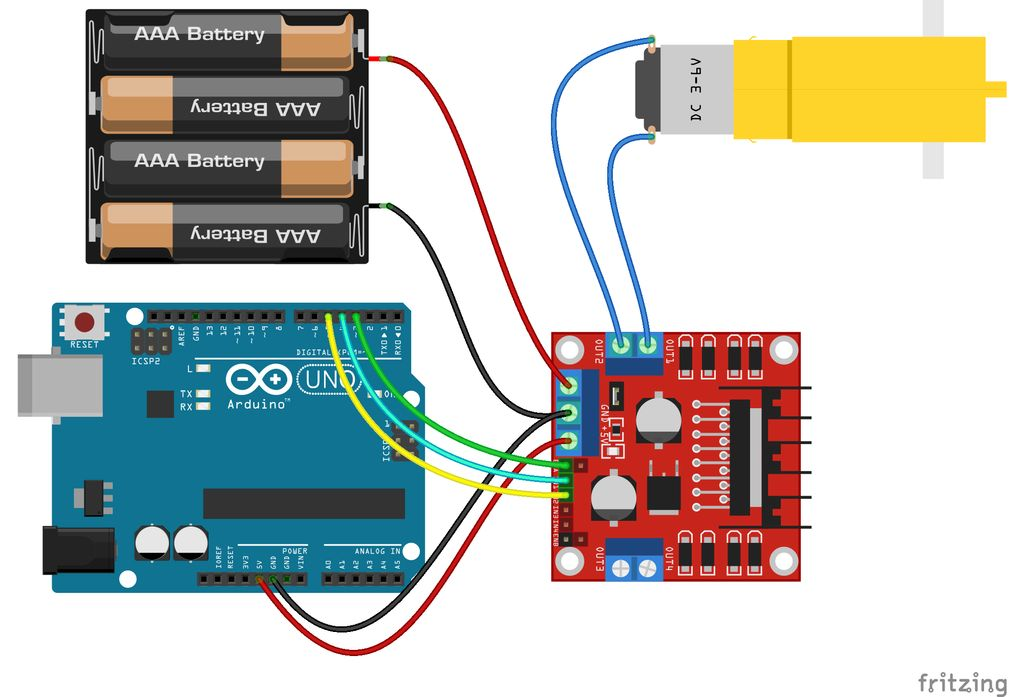

## Размещение батарейки 
В нашем проекте батареи будут размещены в отдельном корпусе машинки, что позволит удобно управлять энергией и обеспечивать компактность устройства. Для управления машинкой мы выбрали плату **Arduino Nano**, так как она идеально подходит для этого проекта: её малые размеры обеспечивают минимализм, а достаточная функциональность позволяет управлять всеми необходимыми компонентами без излишних затрат ресурсов. 

## Написание кода:

### 1. Код для L298N

Для управления моторами с использованием модуля L298N нам нужно управлять двумя основными функциями: направлением вращения моторов и их скоростью. 

- **Направление вращения моторов:** Для каждого мотора используются два пина управления направлением (IN1, IN2 для первого мотора и IN3, IN4 для второго). Если мы подаем на один пин высокий уровень (HIGH), а на другой низкий (LOW), мотор будет вращаться в одном направлении, и наоборот — для другого направления.

- **Скорость вращения моторов:** Для регулировки скорости используем ШИМ (широтно-импульсную модуляцию) с помощью пинов ENA и ENB, которые подключаются к соответствующим каналам мотора. При помощи функции `analogWrite` мы задаем уровень мощности (от 0 до 255), который определяет скорость вращения.

Таким образом, мы можем:
- Включать и выключать моторы с помощью комбинации пинов IN1/IN2 и IN3/IN4.
- Регулировать скорость вращения моторов с помощью пинов ENA и ENB.
- Управлять движением вперед и назад с помощью изменения состояния этих пинов.

Такой базовый подход позволяет контролировать движение машины в разных направлениях и с разной скоростью.

```c


#define ENA 9 
#define ENB 10 
#define IN1 2 
#define IN2 3 
#define IN3 4
#define IN4 5



void setup(){
 pinMode(ENA, OUTPUT);
 pinMode(ENB, OUTPUT);
 pinMode(IN1, OUTPUT);
 pinMode(IN2, OUTPUT);
 pinMode(IN3, OUTPUT);
 pinMode(IN4, OUTPUT);
}


void moveStraight(int speed){
 if(speed < 255 && speed > 0){
  Serial.println("Запускаю двигатели!");
  digitalWrite(IN1, HIGH);
  digitalWrite(IN2, LOW);
  digitalWrite(IN3, HIGH);
  digitalWrite(IN4, LOW);
  analogWrite(ENA, speed);
  analogWrite(ENВ, speed);
 }else {
  Serial.println("Укажите коректные данные 
  скорости!");
 }
}


void moveBack(int speed){
 if(speed < 255 && speed > 0){
  Serial.println("Запускаю двигатели!");
  digitalWrite(IN1, LOW);
  digitalWrite(IN2, HIGH);
  digitalWrite(IN3, LOW);
  digitalWrite(IN4, HIGH);
  analogWrite(ENA, speed);
  analogWrite(ENВ, speed);
 }else {
  Serial.println("Укажите коректные данные 
  скорости!");
 }
}


void stop(){
 Serial.println("Останавливаю двигатели!");
 digitalWrite(IN1, LOW);
 digitalWrite(IN2, LOW);
 digitalWrite(IN3, LOW);
 digitalWrite(IN4, LOW);
 analogWrite(ENA, 0);
 analogWrite(ENВ, 0);
}


void loop() {

}

### Код для HC-05

Для управления движением машины через Bluetooth с использованием модуля HC-05, необходимо передавать команды с пульта управления в виде числовых значений, которые будут интерпретироваться микроконтроллером.

Как уже упоминалось, мы будем использовать два бита для кодирования четырех состояний:

- **0 (00)** — остановка машины (`stop`)
- **1 (01)** — движение вперед (`moveStraight`)
- **2 (10)** — движение назад (`moveBack`)
- **3 (11)** — зарезервировано, не используется в текущем проекте

Чтобы передавать эти значения через Bluetooth, HC-05 будет принимать их как данные по UART (последовательный интерфейс). После получения команды от пульта, микроконтроллер Arduino будет интерпретировать ее и выполнять соответствующее действие.

### Программная реализация

1. **Подключение HC-05 к Arduino:**
   Модуль HC-05 подключается через последовательный интерфейс, используя порты TX и RX. Для связи с Arduino нужно подключить:
   - **TX** модуля HC-05 — к **RX** Arduino.
   - **RX** модуля HC-05 — к **TX** Arduino.
   - Питание HC-05 подключается к 3.3В или 5В в зависимости от модели, а также к земле.

2. **Прием данных от Bluetooth (HC-05):**
   Мы будем использовать функцию `Serial.read()`, чтобы считывать переданные значения из Bluetooth и интерпретировать их. Например, когда Arduino получает число, оно будет соответствовать одному из четырех состояний, указанных выше.

3. **Пример действий для каждого состояния:**
   - При получении **0** (00) — останавливаем машину.
   - При получении **1** (01) — двигаемся вперед.
   - При получении **2** (10) — двигаемся назад.
   - При получении **3** (11) — игнорируем или оставляем для будущих расширений.

4. **Программная реализация команд:**
   Когда Arduino получает команду через Bluetooth, она активирует соответствующие пины управления моторами с помощью L298N, регулируя направление и скорость вращения.

### Пример реализации логики управления:

1. **Инициализация:**
   Вначале нам нужно настроить порты для работы с L298N и HC-05:
   - Пины для управления моторами: `IN1`, `IN2`, `IN3`, `IN4`, `ENA`, `ENB`.
   - Порт для получения данных от HC-05 через UART.

2. **Основной цикл:**
   В основном цикле программы мы будем слушать данные от Bluetooth с помощью `Serial.read()` и выполнять соответствующие действия. Команды будут обрабатываться как целые числа, которые будут соответствовать одному из вышеописанных состояний.

3. **Пример обработки команд:**

   - Если команда равна 0 (00), то оба мотора останавливаются.
   - Если команда равна 1 (01), оба мотора начинают вращаться в одном направлении (вперед).
   - Если команда равна 2 (10), оба мотора вращаются в обратном направлении.

Программа будет продолжать ожидать команд от Bluetooth и выполнять соответствующие действия в реальном времени. 

```c

char motionVector; 

void setup(){
 Serial.begin(9600); 
}


void loop(){
 if (Serial.available()){
  motionVector = Serial.read();
  if (motionVector == ‘0’){
   // вызов функции
  }
  else if (motionVector == ‘1’){
   // вызов функции
  }
  else if (motionVector == ‘2’){
   // вызов функции
  }
 }
}
 

### Совместный код и реализация функций поворота с использованием дифференциального управления

Теперь у нас будет следующая система команд:

- 0 (000) - остановить машину
- 1 (001) - двигаться вперед
- 2 (010) - двигаться назад
- 3 (011) - поворот влево
- 4 (100) - поворот вправо
- 5 (101) - поворот на месте влево
- 6 (110) - поворот на месте вправо

Используя дифференциальное управление, мы можем управлять каждым колесом независимо, что позволяет машине двигаться вперед, назад, поворачиваться на месте или изменять направление движения в зависимости от полученной команды.

```c

#define ENA 9 
#define ENB 10 
#define IN1 2 
#define IN2 3 
#define IN3 4
#define IN4 5

char motionVector; // Переменная для хранения команды


void setup() {
  pinMode(ENA, OUTPUT);
  pinMode(ENB, OUTPUT);
  pinMode(IN1, OUTPUT);
  pinMode(IN2, OUTPUT);
  pinMode(IN3, OUTPUT);
  pinMode(IN4, OUTPUT);

  Serial.begin(9600); // Инициализация Serial для связи с HC-05
}



void moveStraight(int speed) {
  if (speed >= 0 && speed <= 255) {
    Serial.println("Запускаю двигатели вперёд!");
    digitalWrite(IN1, HIGH);
    digitalWrite(IN2, LOW);
    digitalWrite(IN3, HIGH);
    digitalWrite(IN4, LOW);
    analogWrite(ENA, speed);
    analogWrite(ENB, speed);
  } else {
    Serial.println("Укажите корректные данные скорости!");
  }
}



void moveBack(int speed) {
  if (speed >= 0 && speed <= 255) {
    Serial.println("Запускаю двигатели назад!");
    digitalWrite(IN1, LOW);
    digitalWrite(IN2, HIGH);
    digitalWrite(IN3, LOW);
    digitalWrite(IN4, HIGH);
    analogWrite(ENA, speed);
    analogWrite(ENB, speed);
  } else {
    Serial.println("Укажите корректные 
    данные скорости!");
  }
}



void stop() {
  Serial.println("Останавливаю двигатели!");
  digitalWrite(IN1, LOW);
  digitalWrite(IN2, LOW);
  digitalWrite(IN3, LOW);
  digitalWrite(IN4, LOW);
  analogWrite(ENA, 0);
  analogWrite(ENB, 0);
}



void turnLeft(int speed) {
  if (speed >= 0 && speed <= 255) {
    Serial.println("Поворот влево!");
    digitalWrite(IN1, LOW);   
    digitalWrite(IN2, LOW);
    digitalWrite(IN3, HIGH);  
    digitalWrite(IN4, LOW);
    analogWrite(ENA, 0);      
    analogWrite(ENB, speed);  
  } else {
    Serial.println("Укажите корректные данные скорости!");
  }
  
}



void turnRight(int speed) {
  if (speed >= 0 && speed <= 255) {
    Serial.println("Поворот вправо!");
    digitalWrite(IN1, HIGH);   
    digitalWrite(IN2, LOW);
    digitalWrite(IN3, LOW);  
    digitalWrite(IN4, LOW);
    analogWrite(ENA, speed);      
    analogWrite(ENB, 0);  
  } else {
    Serial.println("Укажите корректные данные скорости!");
  }
}



void spinInPlaceLeft(int speed) {
  if (speed >= 0 && speed <= 255) {
    Serial.println("Разворот наместе (влево)!");
    digitalWrite(IN1, LOW);   
    digitalWrite(IN2, HIGH);
    digitalWrite(IN3, HIGH);  
    digitalWrite(IN4, LOW);
    analogWrite(ENA, speed);      
    analogWrite(ENB, speed);  
  } else {
    Serial.println("Укажите корректные данные скорости!");
  }
}



void spinInPlaceRight(int speed) {
  if (speed >= 0 && speed <= 255) {
    Serial.println("Разворот наместе (вправо)!");
    digitalWrite(IN1, HIGH);   
    digitalWrite(IN2, LOW);
    digitalWrite(IN3, LOW);  
    digitalWrite(IN4, HIGH);
    analogWrite(ENA, speed);      
    analogWrite(ENB, speed);  
  } else {
    Serial.println("Укажите корректные данные скорости!");
  }
}




void loop() {
  // эталон скорости взят 150 

  if (Serial.available()) {
    motionVector = Serial.read(); 

    if (motionVector == '0') { 
      stop();
    } else if (motionVector == '1') { 
      moveStraight(150); 
    } else if (motionVector == '2') { 
      moveBack(150);
    }else if (motionVector == '3') { 
      turnLeft(150);
    }else if (motionVector == '4') { 
      turnRight(150);
    }else if (motionVector == '5') { 
      spinInPlaceLeft(150);
    }else if (motionVector == '6') { 
      spinInPlaceRight(150);
    }
  }
}

## Заключение 
С этим кодом и системой команд мы открываем широкий спектр возможностей для управления нашей машиной. Благодаря дифференциальному управлению, каждое колесо может двигаться независимо, что дает нам возможность точно контролировать движение: от простых движений вперед и назад до сложных маневров, таких как повороты на месте или изменение направления. Команды, поступающие через Bluetooth, обрабатываются быстро и точно, что обеспечивает высокую степень маневренности и гибкости при управлении машиной.

Кроме того, с развитием технологий и интеграцией нейронных сетей, можно значительно расширить функциональность этого проекта. Нейронные сети могут быть использованы для реализации более сложных алгоритмов управления, например, для автоматической адаптации поведения машины к окружающей среде, распознавания препятствий, оптимизации маршрута или даже обучения на основе опыта. Таким образом, добавление искусственного интеллекта в этот проект не только повысит его эффективность, но и откроет новые горизонты для автономного вождения, где машина может принимать решения на основе анализа данных с датчиков и камер, без вмешательства человека.